# 청년주택
청년을 위한 주거지원

In [27]:
#주택 수 출력
all_apart_map

### 주제
청년주택의 가격이 적정하게 형성 되어 있는가 ?
<br><br>[서울시 청년역세권주택, 주변 시세보다 임대료 오히려 비싸](https://www.asiatime.co.kr/article/20221014500172)<br>
[4차까지 모집했지만… 청년 외면 받는 행복주택](https://www.kukinews.com/newsView/kuk202206080212)<br>
<br>등 다양한 기사들 존재

## 데이터 추출

### 전처리과정
----------

 - 행복주택과 청년 매입임대주택 및 역세권 청년 주택, 기숙사형 청년주택, 전세임대주택
<br>![1.PNG](1.PNG)<br>
<br>서울시 전월세 실거래가 데이터 추출![2.PNG](2.PNG)<br>
<br>청년안심주택 데이터 크롤링![3.PNG](3.PNG)<br>
<br>행복주택/매입임대 주택목록 데이터 추출![4.PNG](4.PNG)<br><br>
- ![6.PNG](6.PNG)<br>
![5.PNG](5.PNG)<br>
--------------------------
전월세 전환율에 대한 필요성 인지
![7.PNG](7.PNG)<br>
**산출식: depositMoney + (rentalMoney * 12) / 0.052**

# 구체화

![1.P](1_1.jpg)<br>
![1.P](1_2.jpg)<br>


## 자치구 별, 공급유형 별 평균 가격 비교

![](1_3.jpg)
![](1_4.jpg)
![](1_5.jpg)
![](1_6.jpg)

![](2_1.png)
![](2_2.png)
![](2_3.png)
![](2_4.png)

In [25]:
# pd.read_sql("select * from finalResult2",con=con)

In [28]:
popmap #오렌지색이 행복주택 / 블루가 청년안심, 주변 시세보다 낮아 경쟁력있는 곳은 초록색 형광펜

# 결론

1. **청년주택 가격 적절성 평가**: 수집된 데이터와 시각화 결과를 종합하여 청년주택의 가격이 현재 시장 상황과 청년들의 경제적 여건에 부합하는지를 평가합니다.
2. **정책적 측면 고려**: 청년주택의 가격이 정부의 정책 목표와 부합하는지를 검토합니다. 정부의 목표는 청년들의 주거 안정성을 증진하고 주거 부담을 완화하는 것입니다.택의 가격이 다른 주거 옵션과 비교하여 경쟁력을 평가합니다. 이를 통해 청년들이 선택할 수 있는 다양한 주거 옵션 중에서 어떤 선택이 가장 적절한지를 판단합니다.
3. **수요 및 공급 상태 고려**: 청년들의 주거 수요와 현재 청년주택의 공급 상태를 고려하여 가격 적정성을 평가합니다. 이를 통해 필요에 따라 추가적인 주택 공급이나 정책 개선이 필요한지를 파악합니다.
4. **사회적 측면 고려**: 청년들의 주거 문제가 사회적인 안정성과 연관되어 있는지를 고려합니다. 청년들이 안정적인 주거 환경에서 성공적으로 사회에 참여할 수 있는지를 확인합니다.



In [22]:
import pymysql

with open("./db.config",'r') as f:
    db_data = f.read()
db_data = eval(db_data)

_host = db_data['DB_HOST']
_user = db_data['DB_USER']
_password = db_data['DB_PASSWORD']
_name = db_data['DB_NAME']

con = pymysql.connect(host=f'{_host}', user=f'{_user}', password=f'{_password}', db=f'{_name}', charset='utf8')
cur = con.cursor()

where_lh = pd.read_csv("./data/lh_df.csv") #csv 불러옴
where_ansim = pd.read_csv("./data/ansim_df.csv")
#where_lh = lh_df.copy()``
#where_ansim = ansim_df.copy()
where_ansim.loc[14,'x']='126.8982447'
where_ansim.loc[14,'y']='37.5251247'
where_ansim.loc[41,'x']='126.9167221'
where_ansim.loc[41,'y']='37.5507977'
where_ansim.loc[27,'x']='126.837949'
where_ansim.loc[27,'y']='37.5406894' #잘못된 좌표가 있어 몇가지 수기수정
where_hang = where_lh[where_lh['kindRental'] != '매입임대'] # 매입임대가 너무 많아서 매입임대 제외하고 지도에 표기예정
where_ansim.drop(['privateMoneyDepositHigh','privateMoneyRentalLow'], axis=True, inplace=True)

con = pymysql.connect(host=f'{_host}', user=f'{_user}', password=f'{_password}', db=f'{_name}', charset='utf8')
cur = con.cursor()
ansim_tf = pd.merge(where_ansim,pd.read_sql_query("select * from ansim_tf", con=con),on='adresWay')
hang_tf =pd.merge(where_hang,pd.read_sql_query("select * from hangbok_tf", con=con),on='adresWay')
#DB에서 tf 테이블 불러오기 시세보다 낮으면 true(1) / 아니면 false(0)

hang_tf['back'] = ["#03F3B3;" if x == 1 else "star" for x in hang_tf['TF']]
ansim_tf['pubback_1'] = ["#03F3B3;" if x == 1 else None for x in ansim_tf['PUBLIC_TF']]
ansim_tf['priback_2'] = ["#03F3B3;" if x == 1 else None for x in ansim_tf['PRIVATE_TF']]
# 백그라운드 색 지정

popmap = folium.Map(location=[37.5502, 126.982], zoom_start=11)
import folium 
for idx, row in hang_tf.iterrows():
    folium.Marker([row.y, row.x],
                  popup=f"""<div style="white-space: nowrap;">주소: {row.adresWay}<br>주택 종류: {row.kindHouse}\
                    <br>면적: {row.totArea}<br>세대수: {row.scaleTot}<br><span style="background-color: {row.back}">보증금:{row.depositMoney}\
                      <br>월세:{row.rentalMoney}</span></div>""",              
                  icon=folium.Icon(color='orange', icon='star')
                 ).add_to(popmap)
  
for idx, row in ansim_tf.iterrows():
    folium.Marker([row.y, row.x],
                  popup=f"""<div style="white-space: nowrap;">주소: {row.adresWay}<br>주택 종류: {row.kindHouse}\
                    <br>면적: {row.totArea}<br>세대수: {row.scaleTot}<br><span style="background-color: {row.pubback_1}">\
                      공공보증금:{row.publicdepositMoney}<br>공공월세:{row.publicmoneyRental}</span><br><span style="background-color:\
                        {row.priback_2}">민간보증금:{row.privateMoneyDepositLow}\
                        <br>민간월세:{row.privateMoneyRentalHigh}</span></div>""",              
                  icon=folium.Icon(color='blue', icon='star')
                 ).add_to(popmap)
                 
popmap #오렌지색이 행복주택 / 블루가 청년안심, 주변 시세보다 낮아 경쟁력있는 곳은 초록색 형광펜

/tmp/ipykernel_1035/1787385334.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '126.8982447' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  where_ansim.loc[14,'x']='126.8982447'
/tmp/ipykernel_1035/1787385334.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '37.5251247' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  where_ansim.loc[14,'y']='37.5251247'
/tmp/ipykernel_1035/1787385334.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ansim_tf = pd.merge(where_ansim,pd.read_sql_query("select * from ansim_tf", con=con),on='adresWay')
/tmp/ipykernel_1035/1787385334.py:31: UserW

In [3]:
# geocoder 2.0 API로 위도, 경도 데이터 찾기
import requests
from tqdm import tqdm
import pandas as pd
import pymysql

#DB 접속 정보
with open("./db.config",'r') as f:
    db_data = f.read()
db_data = eval(db_data)

#DB 접속
_host = db_data['DB_HOST']
_user = db_data['DB_USER']
_password = db_data['DB_PASSWORD']
_name = db_data['DB_NAME']

con = pymysql.connect(host=f'{_host}', user=f'{_user}', password=f'{_password}', db=f'{_name}', charset='utf8')
cur = con.cursor()

tmp = ''
data = []
failed = []

lh_df = pd.read_sql_query('select * from allLh', con=con)
ansim_df = pd.read_sql_query('select * from ansim', con=con)

/tmp/ipykernel_1035/2656042519.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  lh_df = pd.read_sql_query('select * from allLh', con=con)
/tmp/ipykernel_1035/2656042519.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ansim_df = pd.read_sql_query('select * from ansim', con=con)


In [4]:





for idx, row in tqdm(lh_df.iterrows()):
    apiurl = "https://api.vworld.kr/req/address?"
    params = {
        "service": "address",
        "request": "getcoord",
        "crs": "epsg:4326",
        "address": row['adresWay'],
        "format": "json",
        "type": "road",
        "key": "DC6503B3-A493-3EC3-AC04-D36A0E1594D4"
    }
    response = requests.get(apiurl, params=params)
    if response.status_code == 200:
        tmp = response.json()
        try:
            data.append(tmp['response']['result']['point'])
        except Exception as e:
            params["type"] = "parcel"
            response = requests.get(apiurl, params=params)
            if response.status_code == 200:
                tmp = response.json()
                try:
                    data.append(tmp['response']['result']['point'])
                except Exception as e:
                    failed.append(idx)

for idx, row in tqdm(ansim_df.iterrows()):
    apiurl = "https://api.vworld.kr/req/address?"
    params = {
        "service": "address",
        "request": "getcoord",
        "crs": "epsg:4326",
        "address": row['adresWay'],
        "format": "json",
        "type": "road",
        "key": "DC6503B3-A493-3EC3-AC04-D36A0E1594D4"
    }
    response = requests.get(apiurl, params=params)
    if response.status_code == 200:
        tmp = response.json()
        try:
            data.append(tmp['response']['result']['point'])
        except Exception as e:
            params["type"] = "parcel"
            response = requests.get(apiurl, params=params)
            if response.status_code == 200:
                tmp = response.json()
                try:
                    data.append(tmp['response']['result']['point'])
                except Exception as e:
                    failed.append(idx)
                    
# 위도 경도 데이터 저장
for i in range(len(lh_df)):
    ansim_df.loc[i, 'x'] = data[i]['x']
    ansim_df.loc[i, 'y'] = data[i]['y']

ansim_df.loc[14,'x']='126.8982447'
ansim_df.loc[14,'y']='37.5251247'
ansim_df.loc[41,'x']='126.9167221'
ansim_df.loc[41,'y']='37.5507977'
ansim_df.loc[27,'x']='126.837949'
ansim_df.loc[27,'y']='37.5406894'

61it [00:19,  3.13it/s]


KeyboardInterrupt: 

In [5]:
# CSV 파일 저장
lh_df.to_csv('lh_df.csv', index=False)
ansim_df.to_csv('ansim_df.csv', index=False)

### 청년 주택 정보 제공

In [6]:
where_lh = pd.read_csv("./data/lh_df.csv")
where_ansim = pd.read_csv("./data/ansim_df.csv")
#where_lh = lh_df.copy()``
#where_ansim = ansim_df.copy()

In [7]:
import folium
where_hang = where_lh[where_lh['kindRental'] != '매입임대']
where_all = pd.concat([where_hang,where_ansim])
popmap = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="cartodb positron")
target =  where_all[['x', 'y', 'kindRental','adresWay','adresGu','kindHouse','totArea','scaleTot']].copy()
target['color'] =target.kindRental.apply(lambda x : 'red' if x =="매입임대" else ('blue' if x == "행복주택"  else 'orange')   )
popmap = folium.Map(location=[37.5502, 126.982], zoom_start=11)
for idx, row in target.iterrows():
    folium.Marker([row.y, row.x],
                  popup=f"""<div style="white-space: nowrap;">주소: {row.adresWay}<br>주택 종류: {row.kindHouse}<br>면적: {row.totArea}<br>세대수: {row.scaleTot}</div>""",              
                  icon=folium.Icon(color=row.color, icon='star')
                 ).add_to(popmap)

In [8]:
#지도 출력
popmap

### 비트맵(choropleth)으로 청년 주택 수 출력

In [9]:
import sqlalchemy

from urllib import parse
with open("./db.config",'r') as f:
    db_data = f.read()
db_data = eval(db_data)
_host = db_data['DB_HOST']
_user = db_data['DB_USER']
_password = db_data['DB_PASSWORD']
_name = db_data['DB_NAME']
_port = 3306
_password = parse.quote_plus(_password)
engine = sqlalchemy.create_engine(f"mysql://{_user}:{_password}@{_host}:{_port}/{_name}")

In [10]:
# 각 구별로 중심점 찾기
import folium
import requests
import json
geo_str = requests.get("https://t1.daumcdn.net/cfile/tistory/272C224C58B4BD540B").json()

from shapely.geometry import Polygon, MultiPolygon
nametoloc = {}
for feature in geo_str['features']:
    geometry = feature['geometry']
    properties = feature['properties']
    
    if geometry['type'] == 'Polygon':
        polygon = Polygon(geometry['coordinates'][0])
        center = polygon.centroid.coords[0]
    elif geometry['type'] == 'MultiPolygon':
        polygon = MultiPolygon([Polygon(coord[0]) for coord in geometry['coordinates']])
        center = polygon.centroid.coords[0]
    else:
        continue
    
    # 중심점을 지도에 표시
    nametoloc[properties['name']] = (center[1],center[0])

In [11]:
all_apart_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles="cartodb positron")
pd.read_sql("select * from apart_allRentView",con=engine)['자치구'].sort_values().tolist()


apart_df = pd.read_sql("""SELECT A.adresGu, A.num AS number FROM (SELECT A.adresGu,A.AB + IFNULL(B.AB,0) AS num  FROM (SELECT adresGu, COUNT(*) AS AB 
            FROM allLh GROUP BY adresGu ORDER BY adresGu) A LEFT JOIN (SELECT adresGu, IFNULL(COUNT(*),0) 
            AS AB FROM ansim GROUP BY adresGu ORDER BY adresGu) B ON A.adresGu = B.adresGu) A""", con=engine)
folium.Choropleth(geo_str, 
                  data = apart_df, 
                  columns=['adresGu', 'number'],
                  fill_color= "PuRd",
                  key_on = 'feature.id').add_to(all_apart_map)
for idx, row in apart_df.iterrows():
    adres= row['adresGu']; numb = row['number']
    icon1 = folium.DivIcon(html=f"<div style='font-size: 10pt;font-weight:bold;width:200px'>{adres}<br>({numb}개)</div>")
    folium.Marker(location=nametoloc[row['adresGu']],icon=icon1).add_to(all_apart_map)

In [12]:
#주택 수 출력
all_apart_map

In [13]:
#not apart
notapart_avg_df = pd.read_sql("select * from notapart_allRentView", con=engine)
apart_avg_df = pd.read_sql("select * from notapart_allRentView", con=engine)

In [14]:
pd.read_sql("select * from allLh",con=engine)['kindHouse'].unique()

array(['오피스텔', '다세대주택', '다가구주택', '알수없음', '연립주택', '아파트', '단독주택'],
      dtype=object)

In [15]:
pd.read_sql("(select kindHouse from ansim where kindHouse = '아파트')",con=engine)

,kindHouse
0,아파트
1,아파트
2,아파트
3,아파트
4,아파트
5,아파트
6,아파트
7,아파트
8,아파트
9,아파트


*matplotlib 한글 폰트 설정*

    1. font 설치: sudo apt-get install fonts-nanum
    2. 캐시 디렉터리 찾기
    3. 캐시 제거: rm -r [2번에서 찾은 캐시디렉터리 path]
    4. Nanum Gothic을 폰트 설정





In [16]:
import matplotlib

#matplot 캐시디렉토리 찾기
matplotlib.get_cachedir()

'/home/david/.cache/matplotlib'

In [17]:
# 나눔고딕 폰트 설정
from matplotlib import rc
rc('font',family='NanumGothic')

Text(0.5, 1.0, '호감지수')

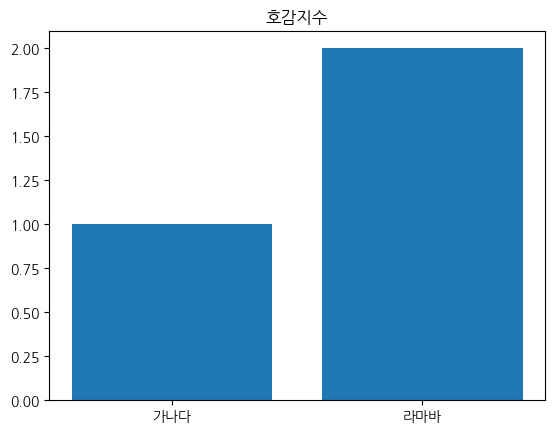

In [18]:
#한글 설정 확인
import matplotlib.pyplot as plt

plt.bar(['가나다','라마바'],[1,2])
plt.title('호감지수')